#Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_data = pd.read_csv("/content/Medicaldataset.csv")

In [3]:
heart_data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


Pada proses ini data yang sudah ada, dipanggil untuk digunakan dalam proses analisis

# Exploratory Data Analysis
Pada tahap ini dilakukan eksplorasi pada data yang memiliki tujuan untuk mendapatkan pengetahuan atau insight dari data yang ada

Deskripsi Variabel

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


- Terdapat 1 kolom yang tipe datanya object, yaitu Result, kolom ini yang akan menjadi target klasifikasi
- Terdapat 3 kolom yang tipe datanya float64 yaitu Blood sugar, CK-MB, Troponin
- Terdapat 5 kolom yang tipe datanya int64, yaitu Age, Gender, Heart rate, Systolic blood pressure, Diastolic blood pressure

In [5]:
heart_data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Dari kode diatas diketahui
- Terdapat 1319 data yang siap digunakan
- Usia pasien yang menjadi subjek dari data secara rata-rata diisi oleh mereka yang berusia 56 tahun

In [6]:
numerical_features = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
categorical_features = ['Gender', 'Result']

        jumlah sampel  persentase
Gender                           
1                 870        66.0
0                 449        34.0


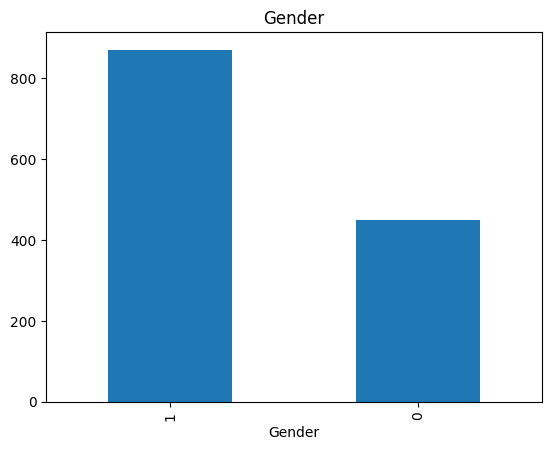

In [7]:
#Fitur Kategori
feature = categorical_features[0]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan dari visualisasi variabel gender dapat kita simpulkan bahwa 1 (laki-laki) lebih mendominasi daripada 0 (perempuan)

          jumlah sampel  persentase
Result                             
positive            810        61.4
negative            509        38.6


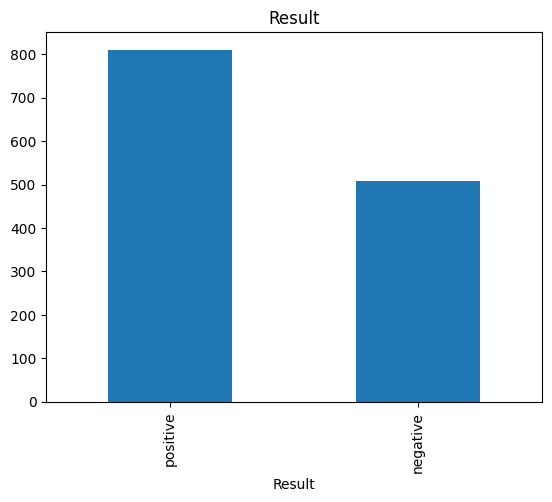

In [8]:
#Fitur Kategori
feature = categorical_features[1]
count = heart_data[feature].value_counts()
percent = 100*heart_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan visualisasi dari variable atau kolom result diketahui positive lebih mendominasi daripada negative, yang artinya pasien yang ada di dalam data banyak yang mengalami serangan jantung (positive) daripada yang tidak (negative)

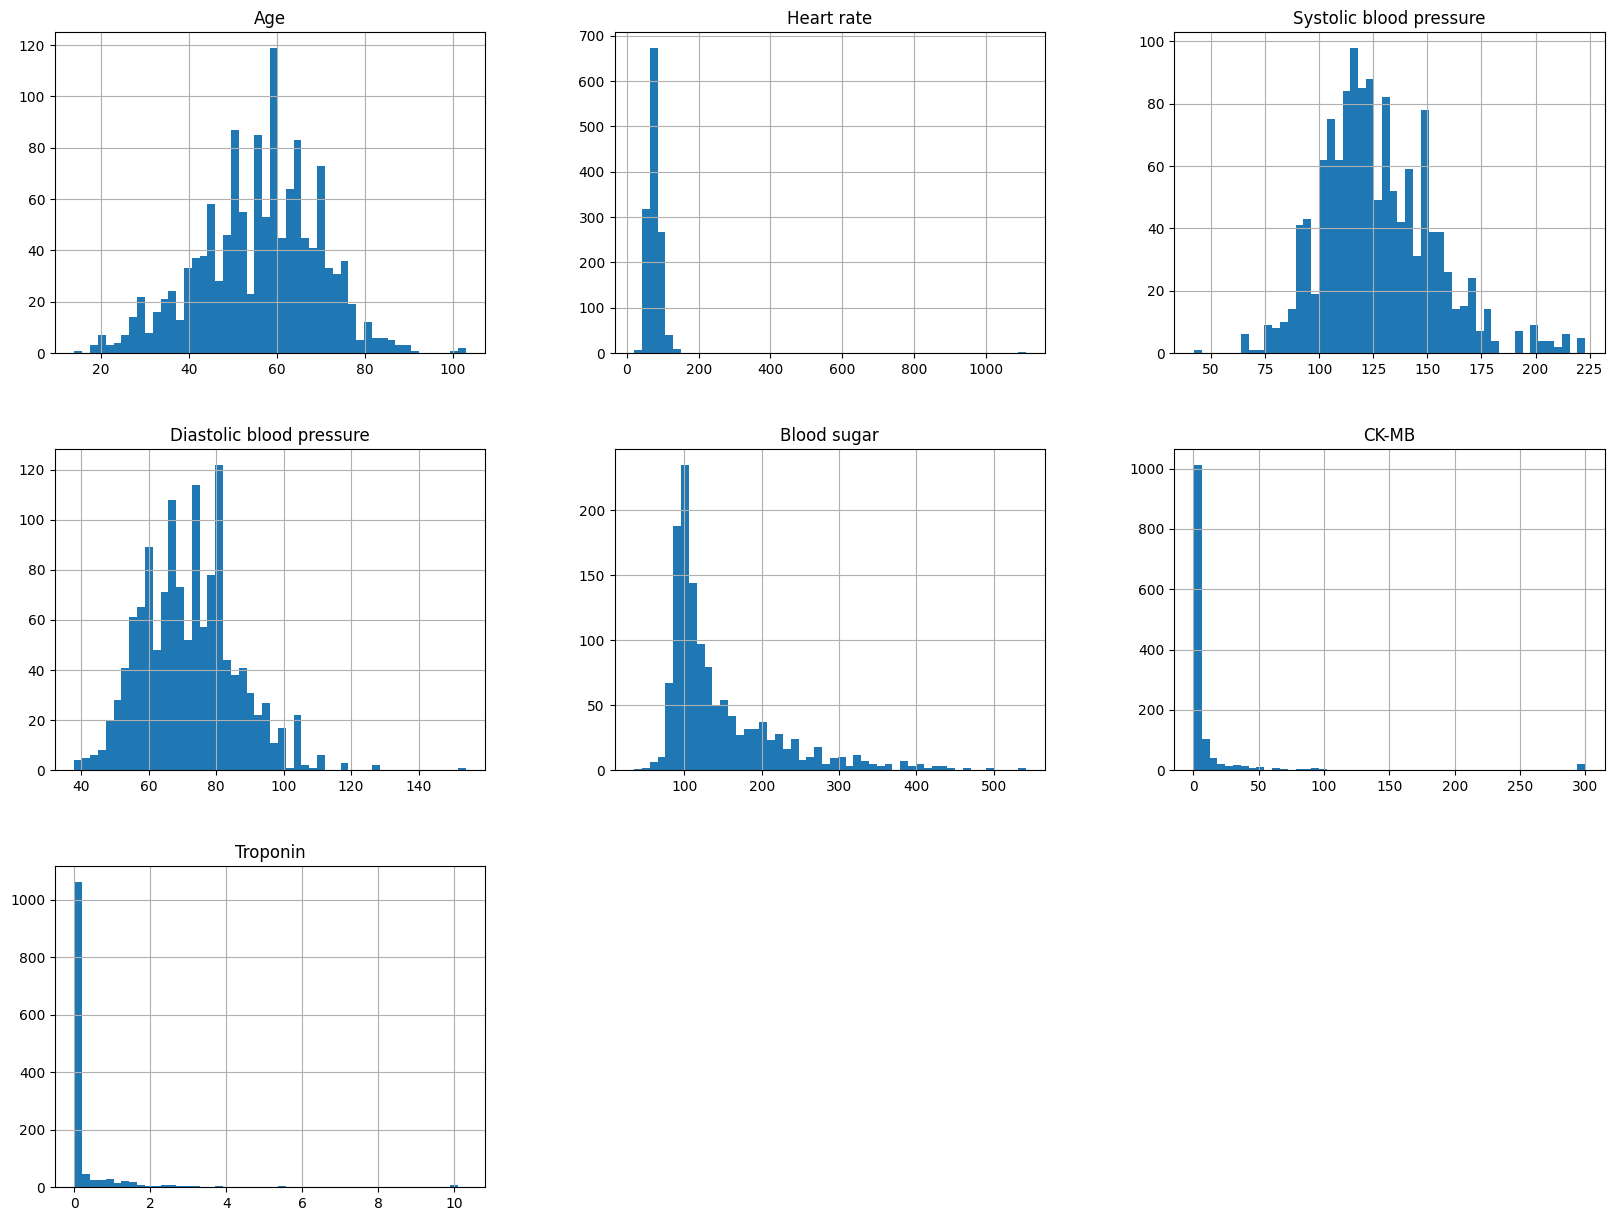

In [9]:
#Fitur Numerik
heart_data[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

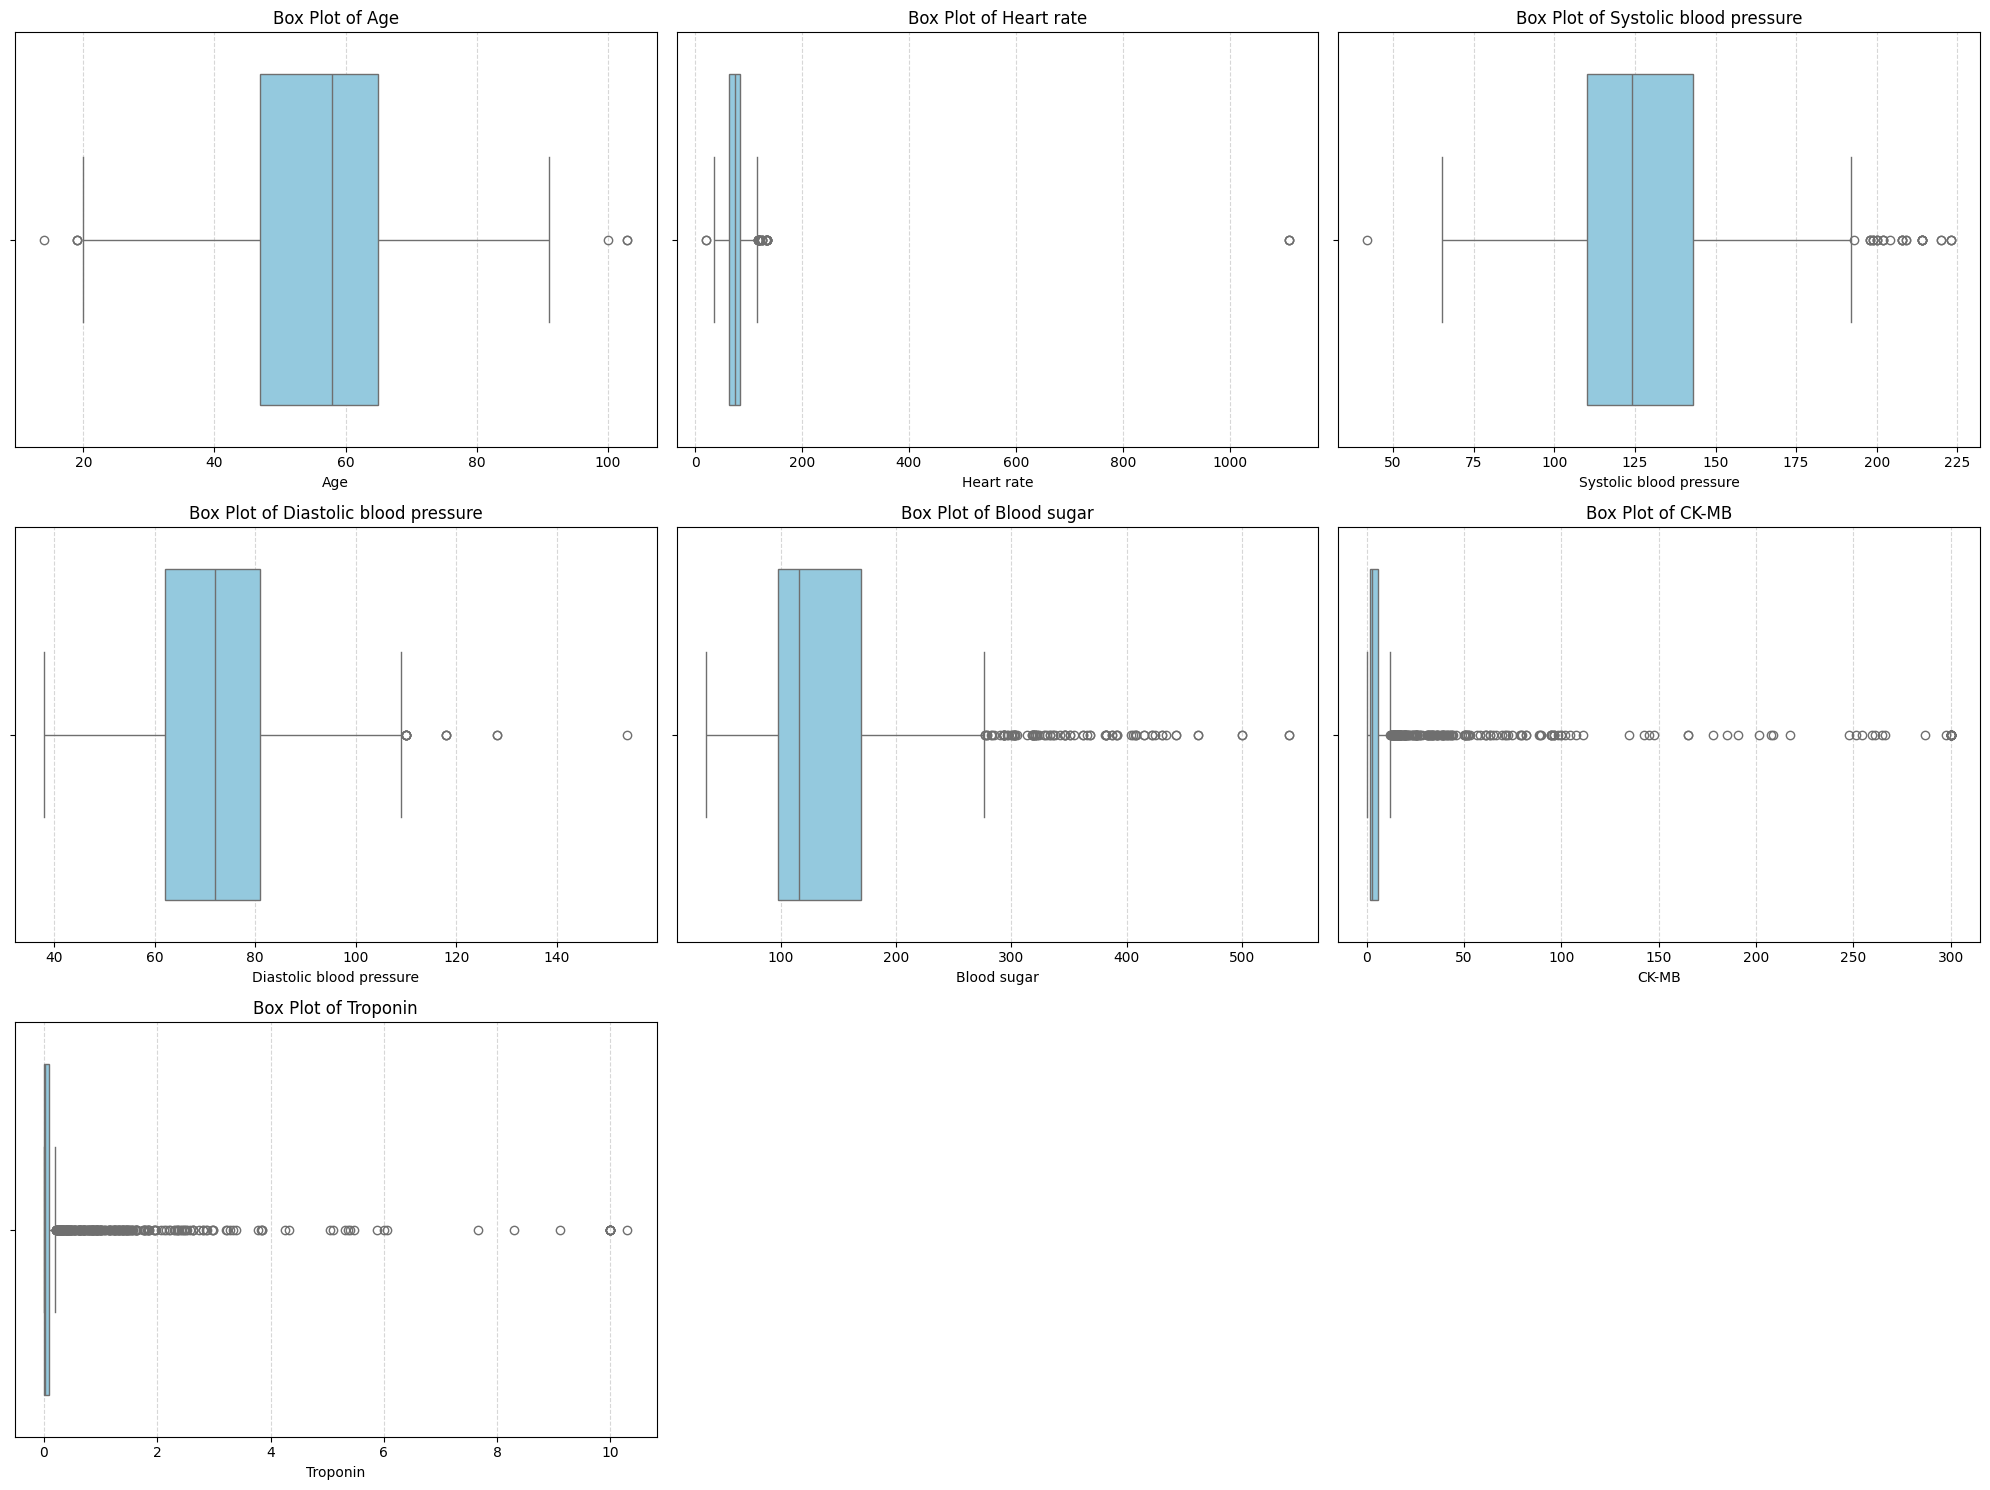

In [10]:
n_cols = 3
n_features = len(numerical_features)
n_rows = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten in case of 2D array

# Loop through each numerical feature and plot it
for idx, feature in enumerate(numerical_features):
    sns.boxplot(x=heart_data[feature], ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Box Plot of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].grid(True, axis='x', linestyle='--', alpha=0.5)

# Hide unused subplots if any
for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Distribusi data numerik
1. Age

Pasien yang berada dalam data memiliki kisaran umur 20 sampai 100, Age memiliki distribusi normal
2. Heart rate

Detak jantung berkisar pada 0 - 200, dan rata - rata berkisar pada 150, memiliki distribusi miring ke kanan (right skewed)
3. Systolic Blood Pressure

Tekanan darah yang berada di arteri ketika jantung berdetak dengan kebanyakan pasien memiliki tekanan berkisar 100 - 150, memiliki distribusi normal
4. Diastolic blood pressure

Tekanan darah dari arteri ketika jantung berhenti sbentar sebelum berdetak kembali, dengan kebanyakan pasien memiliki tekanan berkisar 60 - 80, memiliki distribusi yang miring ke kanan (right skewed)
5. Blood sugar

Gula darah pasien kebanyakan berada pada kisar 100, memiliki distribusi miring ke kanan (right skewed)
6. CK-MB

Ceratine kinase myocardial band yang dimiliki pasien kebanyakan berkisar pada 0 - 20, atau dibawah 25, memiliki distribusi miring ke kanan (right skewed)
7. Troponin

Troponin yang dimiliki pasien kebanyakan hampir bernilai 0, memiliki distribusi miring ke kanan (right skewed)

**Insight**

Data tersebut rata rata memiliki distribusi non normal, dimana kebanyakan kolom atau variabel memiliki disribusi yang miring ke kanan, juga kolom atau variabel "Result" di dominasi oleh positive

# Data Preparation

Pada bagian ini akan dilakukan Encoding variabel atau kolom kategori, dan pembagian data menjadi train dan test, menggunakan fungsi train_test_split

**Encoding menggunakan LabelEncoder**

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode kolom kategorikal
heart_data["Result"] = label_encoder.fit_transform(heart_data["Result"])
heart_data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


**Dataset split menggunakan train_test_split**

In [12]:
from sklearn.model_selection import train_test_split

X = heart_data.drop(["Result"],axis =1)
y = heart_data["Result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [13]:
print(f'Total subjek dari seluruh dataset: {len(X)}')
print(f'Total subjek dari dataset train: {len(X_train)}')
print(f'Total subjek dari dataset test: {len(X_test)}')

Total subjek dari seluruh dataset: 1319
Total subjek dari dataset train: 1187
Total subjek dari dataset test: 132


# Model Development

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [15]:
nn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


# Evaluation

Model akan di evaluasi menggunakan metrik akurasi, presisi, recall dan F1-Score

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [17]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(nn, X_test, y_test), # Menggunakan KNeighborsClassifier (nn)
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),       # Menggunakan RandomForestClassifier (rf)
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test), # Menggunakan SVM (svm)
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),       # Menggunakan DecisionTreeClassifier (dt)
}

In [18]:
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision  Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.674242   0.740260  0.7125  0.726115
1            Random Forest (RF)  0.992424   0.987654  1.0000  0.993789
2  Support Vector Machine (SVM)  0.681818   0.675926  0.9125  0.776596
3            Decision Tree (DT)  0.992424   0.987654  1.0000  0.993789
